In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import random as rnd
from tqdm import tqdm_notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat as ps
from sklearn import datasets
import statistics as st
from numpy import nanmedian, NaN
from scipy import stats

# Определение стоимостей конечных продуктов

In [3]:
Ps = []

df1 = pd.read_excel("C:\Data\Борщ_Краснодар2021.xlsx")
print(df1)

# на месяц борща нужно: 2*30=60 на человека, 16 порции состоит из 1 кг говядины, 1 кг картофеля, 1 кг капусты, 0,6 кг свеклы, 0,6 кг моркови, 0,5 кг лука, 0,2 кг петрушки
# на 60 порций (1 месяц) получим: 3,75 кг говядины, 3,75 кг картошки, 3,75 кг капусты, 2,25 кг свеклы, 2,25 кг моркови, 1,875 кг лука, 0,75 кг петрушки

# стоимость супа (борща) в первом квартале:
cost_soup = 0.75*df1[rnd.randint(1, 3)][0] + 3.75*df1[rnd.randint(1, 3)][1] + 3.75*df1[rnd.randint(1, 3)][2] + 1.875*df1[rnd.randint(1, 3)][3] + 2.25*df1[rnd.randint(1, 3)][4] + 2.25*df1[rnd.randint(1, 3)][5] + 3.75*df1[rnd.randint(1, 3)][6]
Ps.append(cost_soup)
print("\n", cost_soup)

              Unnamed: 0       1       2       3       4       5       6  \
0               Петрушка  200.00  204.33  185.83  200.00  179.00  179.50   
1  Капуста белокочанная    15.50   17.20   18.00   19.40   21.20   18.71   
2             Картофель    19.72   23.60   24.97   26.29   28.25   29.71   
3           Лук репчатый   16.94   19.42   20.25   21.00   22.50   21.71   
4               Морковь    20.69   23.97   24.40   26.50   29.80   48.70   
5               Свёкла     19.70   22.20   25.69   28.16   28.37   46.00   
6      Говядина на кости  294.15  292.13  292.48  299.98  306.50  303.58   

        7       8       9      10      11      12  
0  212.50  210.00  180.00  189.38  202.50  170.33  
1   20.40   22.50   24.33   25.88   30.67   33.14  
2   19.63   21.00   23.31   26.75   33.17   35.71  
3   17.25   17.75   18.67   18.60   19.00   19.92  
4   33.83   23.25   24.25   25.25   28.33   28.50  
5   36.40   26.50   20.40   24.50   24.93   28.89  
6  304.98  302.98  297.98  

In [4]:
df2 = pd.read_excel("C:\Data\Ленивые голубцы_Краснодар2021.xlsx")
print(df2)

# на месяц голубцов нужно: 2*30=60, 2 порции состоят из 0,4 кг тилапии, 0,25 кг капусты, 0,07 кг риса, 0,07 кг лука, 0,2 л томатного сока, 0 кг лаврового листа, 0,3 л подсолнечного масла 
# на 60 порций (1 месяц) получим: 15 кг тилапии, 7.5 кг капусты, 2.1 кг риса, 2.1 кг лука, 6 л томатного сока, 0 кг лаврового листа, 6 л подсолнечного масла,

# стоимость основного (голубцов) в первом квартале
cost_main = 15*df2[rnd.randint(1, 3)][0] + 7.5*df2[rnd.randint(1, 3)][1] + 2.1*df2[rnd.randint(1, 3)][2] + 2.1*df2[rnd.randint(1, 3)][3] + 6*df2[rnd.randint(1, 3)][4] + 0*df2[rnd.randint(1, 3)][5] + 6*df2[rnd.randint(1, 3)][6]
Ps.append(cost_main)
print("\n", cost_main)

           Unnamed: 0       1       2       3
0             Тилапия  307.26  335.86  336.46
1            Капуста    15.50   17.20   18.00
2                 Рис   47.45   46.70   46.57
3                Лук    16.94   19.42   20.25
4        Сок томатный   41.48   42.39   42.36
5       Лавровый лист   14.47   14.04   14.04
6  Масло растительное   90.81   91.95   93.42

 6118.6709999999985


In [5]:
df3 = pd.read_excel("C:\Data\Цезарь_Краснодар2021.xlsx")
print(df3)

# на месяц Цезаря c курицей нужно: 2*30=60, 2 порции состоят из 0,8 кг курицы, 0,6 кг салата айсберг, 0,32 кг батона, 0,08 кг сыра пармезан, 0,15 кг помидоров черри, 6 куриных яиц, 0,105 л подсолнечного масла, 0,15 кг чеснока, 0,05 л = 0,01 кг лимнной кислоты
# на 60 порций получим: 24 кг курицы, 18 кг салата айсберг, 9.6 кг батона, 0.24 кг сыра пармезан, 4.5 кг помидоров черри, 180 = 18 десятков куриных яиц, 30.15 л подсолнечного масла, 1.5 кг чеснока, 0.3 кг = 6 пачек лимонной кислоты

# стоимость салата (Цезарь с курицей) в первом квартале
cost_salat = 24*df3[rnd.randint(1, 3)][0] + 18*df3[rnd.randint(1, 3)][1] + 9.6*df3[rnd.randint(1, 3)][2] + 0.24*df3[rnd.randint(1, 3)][3] + 4.5*df3[rnd.randint(1, 3)][4] + 18*df3[rnd.randint(1, 3)][5] + 30.15*df3[rnd.randint(1, 3)][6] + 1.5*df3[rnd.randint(1, 3)][7] + 6*df3[rnd.randint(1, 3)][8] + 6*df2[rnd.randint(1, 3)][0]
Ps.append(cost_salat)
print("\n", cost_salat)

                   Unnamed: 0       1       2       3
0                Филе куриное  224.50  230.50  237.25
1     Салат айсберг (Капуста)   15.50   17.20   18.00
2                       Батон   91.14   91.14   91.14
3   Сыр пармезан (адыгейский)  333.43  337.39  336.62
4   Помидоры черри (помидоры)   98.25   93.75   91.67
5  Яйца перепелиные (куриные)   67.43   72.29   75.83
6          Масло растительное   90.81   91.95   93.42
7                      Чеснок  149.29  157.57  160.63
8                  Сок лимона   13.61   13.99   14.19

 13610.720099999999


In [6]:
df4 = pd.read_excel("C:\Data\Чизкейк_Краснодар2021.xlsx")
print(df4)

# на месяц чизкейка нужно: 1*30, 1 поция состоит из 0.065 л сливочного масла, 0,2 кг печенья, 0,312 л сахара, 0,0375 л соли, 1 кг сливочного сыра, 1 лимон, 0,4 десятка яиц, 0,25 л сметаны
# на 30 порций получим: 1.95 л = 1.775 кг сливочного масла, 6 кг печенья, 9.36 л = 5.43 кг сахара, 0.08 кг соли, 30 кг сливочного сыра, 3 кг лимона, 12 десятков яиц, 7,5 кг 

# стоимость десерта (чизкейка) в первом квартале
cost_desert = 1.775*df4[rnd.randint(1, 3)][0] + 6*df4[rnd.randint(1, 3)][1] + 5.43*df4[rnd.randint(1, 3)][2] + 0.08**df4[rnd.randint(1, 3)][3] + 30*df4[rnd.randint(1, 3)][4] + 3*df4[rnd.randint(1, 3)][5] + 12*df4[rnd.randint(1, 3)][6] + 7.5*df4[rnd.randint(1, 3)][7]
Ps.append(cost_desert)
print("\n", cost_desert)

         Unnamed: 0       1       2       3
0   Масло сливочное  323.11  330.70  330.71
1  Крекеры (печень)  118.90  116.02  115.90
2             Сахар   43.48   39.15   40.98
3              Соль   12.36   12.61   12.54
4     Сливочный сыр  422.00  404.32  406.73
5             Лимон   87.17   88.33   87.67
6      Яйца куриные   67.43   72.29   75.83
7           Сметана   85.34   85.35   83.79

 15333.336650000001


In [7]:
Ps

[1529.8425, 6118.6709999999985, 13610.720099999999, 15333.336650000001]

In [8]:
class potrebitel : # задание класса потребителей
    'Это класс potrebitel'
    
    def __init__(self, s, potreb, lvl=-1): # потребитель задается суммой, вектором потребления и уровнем потребления
        self.s = s 
        self.potreb = potreb
        self.lvl = lvl

    def findlvl (self):
        Sum=[]
        Su=0
        Ps = []
        
        df1 = pd.read_excel("C:\Data\Борщ_Краснодар2021.xlsx")
        cost_soup = 0.75*df1[rnd.randint(1, 3)][0] + 3.75*df1[rnd.randint(1, 3)][1] + 3.75*df1[rnd.randint(1, 3)][2] + 1.875*df1[rnd.randint(1, 3)][3] + 2.25*df1[rnd.randint(1, 3)][4] + 2.25*df1[rnd.randint(1, 3)][5] + 3.75*df1[rnd.randint(1, 3)][6]
        Ps.append(cost_soup)
        
        df2 = pd.read_excel("C:\Data\Ленивые голубцы_Краснодар2021.xlsx")
        cost_main = 15*df2[rnd.randint(1, 3)][0] + 7.5*df2[rnd.randint(1, 3)][1] + 2.1*df2[rnd.randint(1, 3)][2] + 2.1*df2[rnd.randint(1, 3)][3] + 6*df2[rnd.randint(1, 3)][4] + 0*df2[rnd.randint(1, 3)][5] + 6*df2[rnd.randint(1, 3)][6]
        Ps.append(cost_main)
        
        df3 = pd.read_excel("C:\Data\Цезарь_Краснодар2021.xlsx")
        cost_salat = 24*df3[rnd.randint(1, 3)][0] + 18*df3[rnd.randint(1, 3)][1] + 9.6*df3[rnd.randint(1, 3)][2] + 0.24*df3[rnd.randint(1, 3)][3] + 4.5*df3[rnd.randint(1, 3)][4] + 18*df3[rnd.randint(1, 3)][5] + 30.15*df3[rnd.randint(1, 3)][6] + 1.5*df3[rnd.randint(1, 3)][7] + 6*df3[rnd.randint(1, 3)][8] + 6*df2[rnd.randint(1, 3)][0]
        Ps.append(cost_salat)
        
        df4 = pd.read_excel("C:\Data\Чизкейк_Краснодар2021.xlsx")
        cost_desert = 1.775*df4[rnd.randint(1, 3)][0] + 6*df4[rnd.randint(1, 3)][1] + 5.43*df4[rnd.randint(1, 3)][2] + 0.08**df4[rnd.randint(1, 3)][3] + 30*df4[rnd.randint(1, 3)][4] + 3*df4[rnd.randint(1, 3)][5] + 12*df4[rnd.randint(1, 3)][6] + 7.5*df4[rnd.randint(1, 3)][7]
        Ps.append(cost_desert)
    
        for j in range (len(Ps)):
            Ps[j]=Ps[j]*(self.potreb[j]>0)*self.potreb[j]
        for i in range (len(Ps)-1):
            Sum.append(sum(Ps[0: i+1]))
        
        Sum[2]+=Ps[3]*(self.potreb[3]>0)*self.potreb[3]
                
        self.sum = []
        for i in range (len(Ps)-1):
            self.sum.append(Sum[i])
        
        if (self.s < Sum[0]):  
            self.lvl = 0
            return 0
            
        if ((self.s >= Sum[0]) and (self.s < Sum[1])):
            self.lvl = 1
            return 1
            
        if ((self.s >= Sum[1]) and (self.s < Sum[2])):
            self.lvl = 2
            return 2
        
        if (self.s >= Sum[2]):
            self.lvl = 3
            return 3
                

# Доходы, потраченные на продукты

In [9]:
DF = pd.read_excel("C:\Data\Doxod3_41.xlsx")
#print(DF)

D = DF['prod']
print(D)

0      39032.50
1      46364.50
2      17966.00
3      21286.85
4      35340.50
         ...   
903    45051.50
904    34780.07
905    31568.81
906    27734.46
907    31408.00
Name: prod, Length: 908, dtype: float64


# Стратификация благ

C:\Users\vyand\AppData\Local\Temp/ipykernel_4956/2572821146.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(D))):


  0%|          | 0/908 [00:00<?, ?it/s]

Maximum value = 3 
Minimum value = 0 
Mean = 1.802863436123348 
Median = 2.0 
Variance = 0.3917539152710125 


На 0 уровне (уровнь нехватки): 5 
На 1 уровне (уровень бедности): 270 
На 2 уровне (уровень достаточности): 532 
На 3 уровне (уровень избыточности): 101 



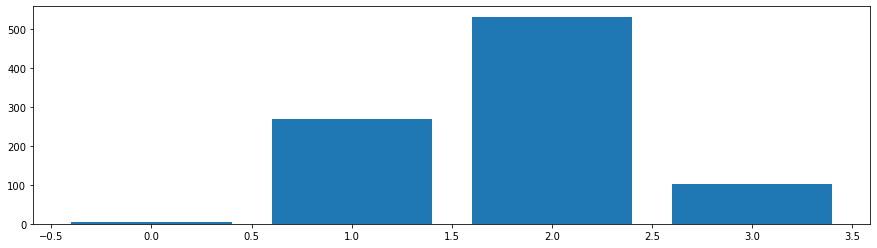

In [10]:
p=[]

for i in tqdm_notebook(range(len(D))):
    potreb = [rnd.randint(2, 6), rnd.randint(1, 5), rnd.randint(0, 4), rnd.randint(0, 3)]
    s = D[i]
    p1 = potrebitel(s, potreb)
    p1.findlvl()
    p.append(p1)
    
pp = []
count = [0, 0, 0, 0]

for i in range (len(p)):
    pp.append(p[i].lvl)
    if (p[i].lvl == 0):
        count[0] += 1
    if (p[i].lvl == 1):
        count[1] += 1
    if (p[i].lvl == 2):
        count[2] += 1
    if (p[i].lvl == 3):
        count[3] += 1
        
print("Maximum value =", max(pp), "\nMinimum value =", min(pp), "\nMean =", np.mean(pp), "\nMedian =", nanmedian(pp), "\nVariance =", np.var(pp), "\n\n")
print("На 0 уровне (уровнь нехватки):", count[0], "\nНа 1 уровне (уровень бедности):", count[1], "\nНа 2 уровне (уровень достаточности):", count[2], "\nНа 3 уровне (уровень избыточности):", count[3], '\n')


index = [0,1,2,3]
fig, ax1 = plt.subplots(figsize=(15, 4))
ax1.bar(index, count)
plt.show()

In [11]:
I0 = []

for i in range(len(D)):
    if (p[i].lvl == 0):
        I0.append(i)

I0

[435, 599, 763, 765, 860]

In [12]:
r = rnd.randint(1, len(D))
print(F"Сводка по {r} потребителю","\nУровень:", p[r].lvl, "\nРасполагаемый на продукты доход:", D[r], "\nВектор потребления", p[r].potreb, "\nГраничные уровневые суммы:", p[r].sum)

Сводка по 697 потребителю 
Уровень: 2 
Располагаемый на продукты доход: 55152.5 
Вектор потребления [5, 5, 3, 0] 
Граничные уровневые суммы: [7570.7625, 35923.222499999996, 76722.9198]


# Индекс по персональному уровню

Maximum value = 9.322845051672116 
Minimum value = 0.026615228780005835 
Mean = 2.4849614236012196 
Median = 2.0106289092197023 
Variance = 2.299475853643794 


stat. = 297.63599209077955 p-value = 2.339728739181341e-65


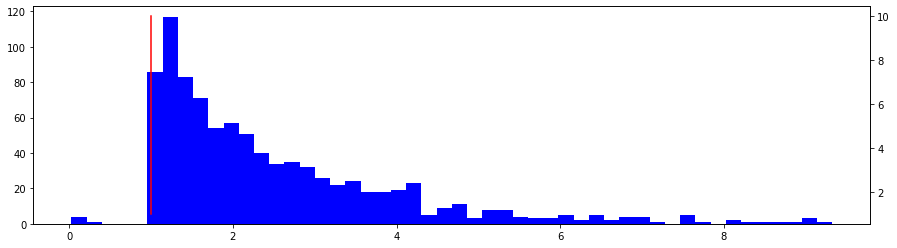

Число потребителей ненулевого уровня, чей IwPl не больше 1.6: 326
Число потребителей, чей IwPl меньше 1: 5


In [53]:
IwPl = []

for i in range(len(D)):
    IwPl.append(D[i]/p[i].sum[p[i].lvl-1])

for i in range(len(IwPl)):
    if (IwPl[i]>100000000000000000):
        #print(D[i],p[i].sum[p[i].lvl-1], i)
        print ("Есть бесконечный индекс!")

print("Maximum value =", max(IwPl), "\nMinimum value =", min(IwPl), "\nMean =", np.mean(IwPl), "\nMedian =", nanmedian(IwPl), "\nVariance =", np.var(IwPl), "\n\n")

k, pv = stats.normaltest(IwPl)
print("stat. =", k, "p-value =", pv)
    
fig, ax1 = plt.subplots(figsize=(15, 4))
ax1.hist(IwPl, 50, color='blue')
ax2 = ax1.twinx() # еще одна ненужная строка (ее не удалять!)
ax2.plot([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], color="r")
plt.show()

In1 = []
countIn1 = 0
ID1 = []
for i in range (len(D)):
    if ((IwPl[i] < 1.6) and (IwPl[i] > 1)):
        In1.append(IwPl)
        countIn1 += 1
        ID1.append(i)
        
print("Число потребителей ненулевого уровня, чей IwPl не больше 1.6:", countIn1)

In2 = []
countIn2 = 0
ID2 = []
for i in range (len(D)):
    if (IwPl[i] < 1):
        In2.append(IwPl)
        countIn2 += 1
        ID2.append(i)
        
print("Число потребителей, чей IwPl меньше 1:", countIn2)

In [14]:
r = rnd.choice(ID1)
print(F"Сводка по {r} потребителю","\nУровень:", p[r].lvl, "\nРасполагаемый на продукты доход:", D[r], "\nВектор потребления", p[r].potreb, "\nГраничные уровневые суммы:", p[r].sum, "\nКритическая сумма изменений:", D[r]-p[r].sum[p[r].lvl-1])

Сводка по 86 потребителю 
Уровень: 3 
Располагаемый на продукты доход: 93437.5 
Вектор потребления [6, 4, 3, 1] 
Граничные уровневые суммы: [9275.1975, 31940.8335, 88292.6753] 
Критическая сумма изменений: 5144.824699999997


# Индекс по уровню достаточности

Maximum value = 8.507425758425184 
Minimum value = 0.15554096693533626 
Mean = 1.7583458519599207 
Median = 1.403132103715432 
Variance = 1.5957956826091857 


stat. = 352.5443364496361 p-value = 2.792351118374995e-77


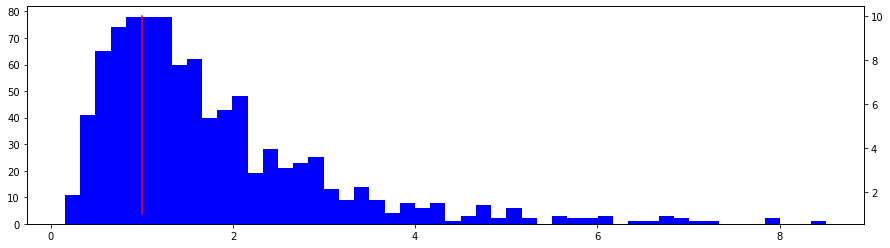

Число потребителей, чей IwPl в отрезке [1;1.5]: 216


In [52]:
IwSl = []

for i in range(len(D)):
    IwSl.append(D[i]/p[i].sum[1])

for i in range(len(IwPl)):
    if (IwSl[i]>100000000000000000):
        #print(D[i],p[i].sum[p[i].lvl-1], i)
        print ("Есть бесконечный индекс!")

print("Maximum value =", max(IwSl), "\nMinimum value =", min(IwSl), "\nMean =", np.mean(IwSl), "\nMedian =", nanmedian(IwSl), "\nVariance =", np.var(IwSl), "\n\n")

k, pv = stats.normaltest(IwSl)
print("stat. =", k, "p-value =", pv)
    
fig, ax1 = plt.subplots(figsize=(15, 4))
ax1.hist(IwSl, 50, color='blue')
ax2 = ax1.twinx() # еще одна ненужная строка (ее не удалять!)
ax2.plot([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], color="r")
plt.show()

In3 = []
countIn3 = 0
ID3 = []
for i in range (len(D)):
    if ((IwSl[i] > 1) and (IwSl[i] < 1.5)):
        In3.append(IwPl)
        countIn3 += 1
        ID3.append(i)
        
print("Число потребителей, чей IwPl в отрезке [1;1.5]:", countIn3)

In [26]:
np.corrcoef(IwPl, IwSl)

array([[1.       , 0.1085461],
       [0.1085461, 1.       ]])

In [27]:
np.corrcoef(IwPl, pp)

array([[ 1.        , -0.43182765],
       [-0.43182765,  1.        ]])

In [28]:
np.corrcoef(IwSl, pp)

array([[1.        , 0.61832647],
       [0.61832647, 1.        ]])